# Bank Churn Prediction

## Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Problem Statement

Given a bank customer, how can we build a neural network-based classifier that can determine whether the customer will leave the bank or not in the next 6 month?

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from  sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from keras import callbacks
import warnings
warnings.filterwarnings("ignore")

# Libraries to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.metrics import Recall
import random

## Loading the dataset

In [2]:
data = pd.read_csv("data_sets/Churn.csv")

## Data Overview

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )
                    1=Yes ( Customer left the bank )

### Checking the shape of the dataset

In [3]:
data.shape

(10000, 14)

* Raw data set has 10000 rows and 14 columns 

### Checking the first 5 and last 5 rows of the dataset

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Droping RowNumber,CustomerID & Surname Columns

In [6]:
data.drop("RowNumber",axis=1, inplace=True)
data.drop("CustomerId",axis=1, inplace=True)
data.drop("Surname",axis=1, inplace=True)

### Checking the data types of the columns for the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


* We have 9 numerical columns and 4 categorical/non numerical columns

### Check misssing Values 

In [8]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* We have no missing values

### Checking  Duplicate Values

In [9]:
data.duplicated().sum()

0

In [10]:
data.loc[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


* No duplicate values

### Statistical summary of the dataset

In [11]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


### Data Overview Summary

* The average credit score is 650 with a standard deviation of 96. 75% of the population has a credit score of 718
* We have 3 geographical locations, Majority of the customers are located in France constituting 5014 of the population
* Male gender constitutes more than 50% of the population
* The average age of the population is 38 with 50%+ of the population aged above 37
* The average tenure is 5 years.
* The mean account balance is 76485. We observe a high std of 62397
* 50% of the customers have account balances of 97,000 with a max observed of 250898
* On average a customer has 1 -2 products held with the bank. 
* The average estimated salary is 100,000 which constitutes more than 50% of the population as observed

## Exploratory Data Analysis

### Declaring common Functions to be used for the EDA

In [12]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    
    
    
    
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot 

### Univariate Analysis

`CreditScore`     

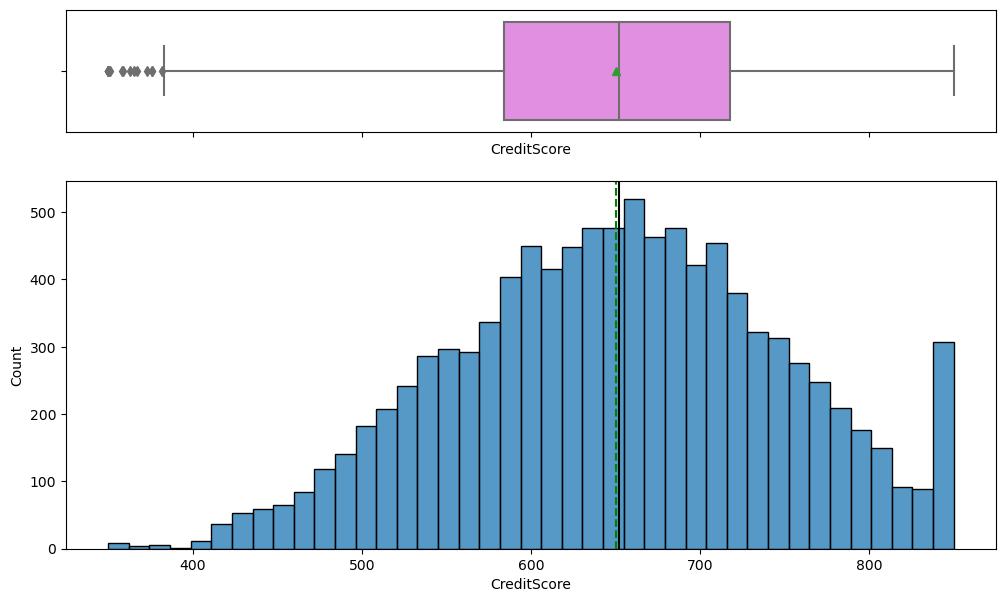

In [13]:
histogram_boxplot(data,"CreditScore")

* CreditScore column is skewed to the left
* We observe a few outliers in this column

`Geography` 

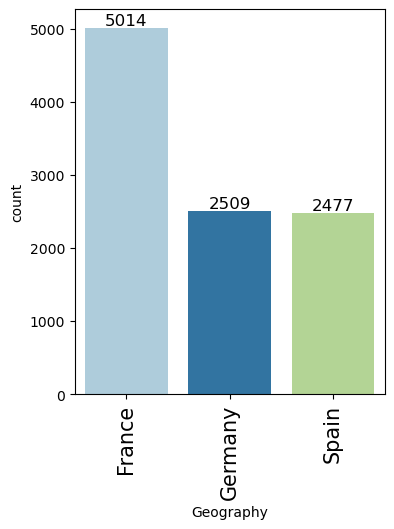

In [14]:
labeled_barplot(data,"Geography")

* Majority of the customers are from France with 5014 count
* Germany and spain follow closely with 2509 & 2477 respectively

`Gender` 

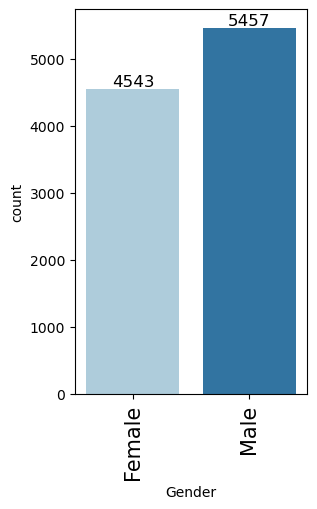

In [15]:
labeled_barplot(data,"Gender")

* Majority of the customers are Male


`Age` 

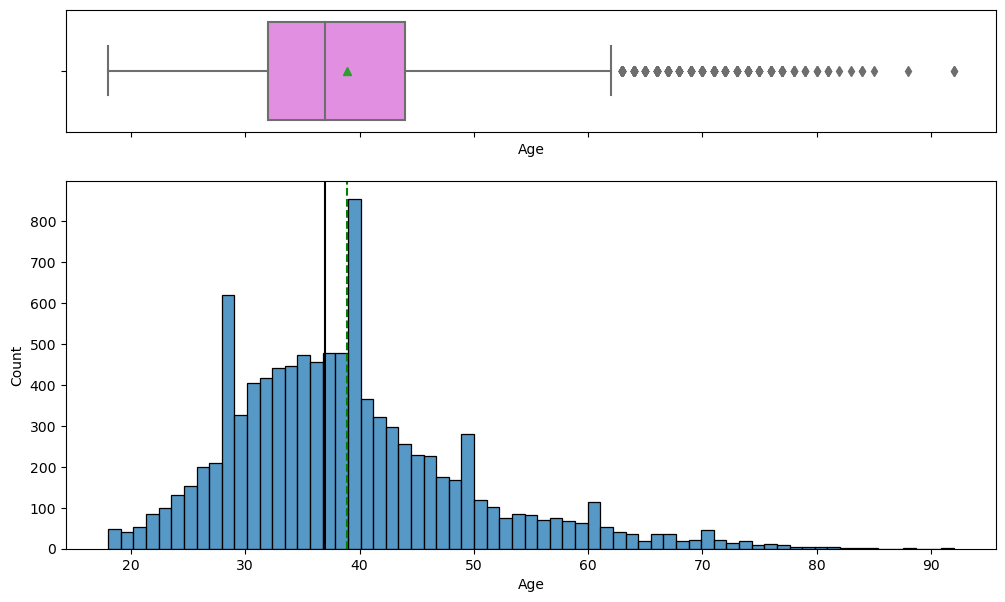

In [16]:
histogram_boxplot(data,"Age")

* Age distirbution is right skewed with few outliers observed

`Tenure`

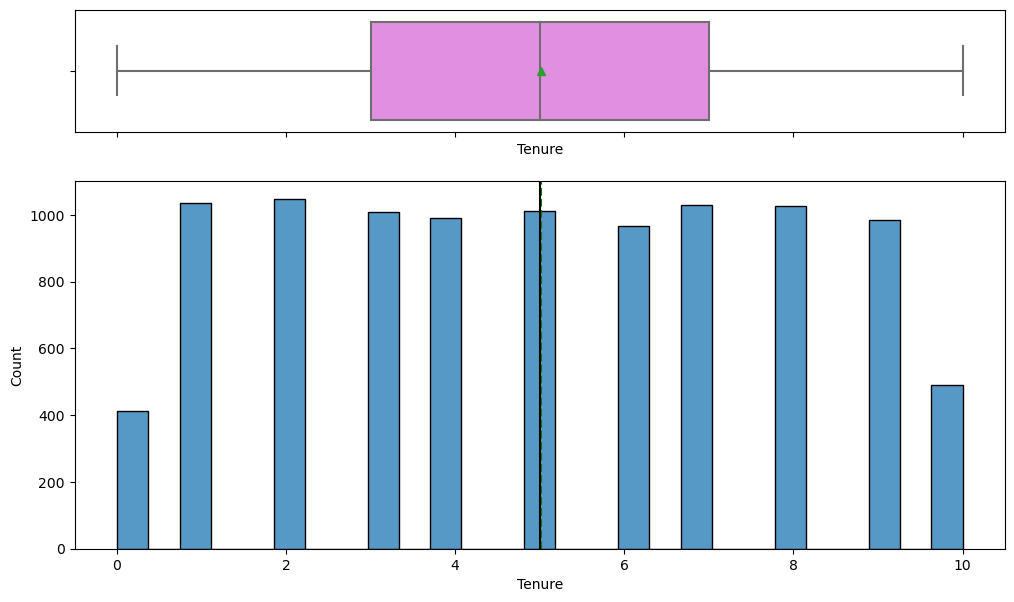

In [17]:
histogram_boxplot(data,"Tenure")

* The distribution for Tenure is normal with slight sparseness

`Balance`

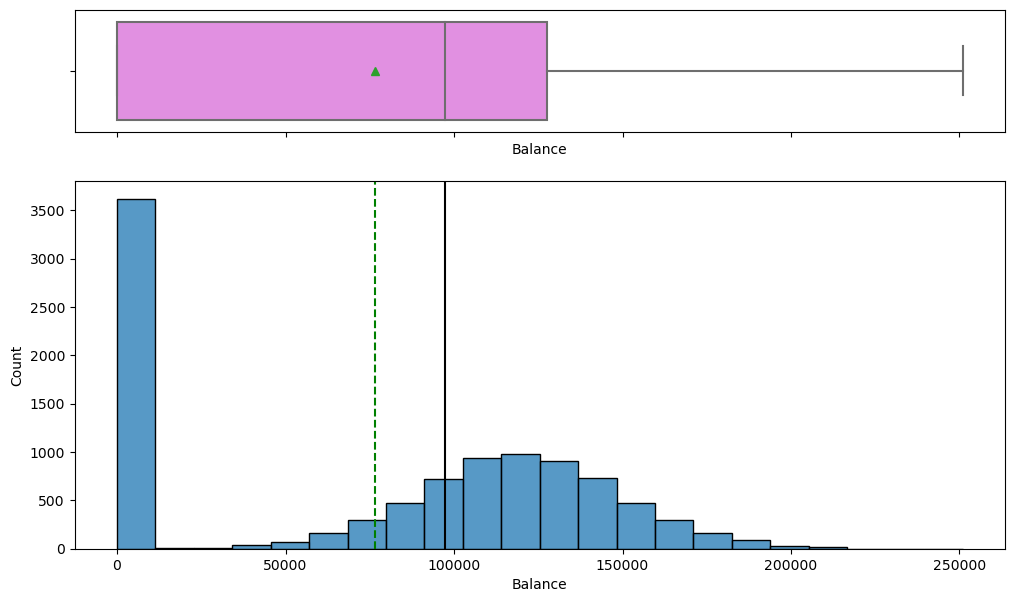

In [18]:
histogram_boxplot(data,"Balance")

* Disbribution for this column is left skewed
* Majority of customers have Zero Balance constituting over 3500 of the population
* We however observe an even distribution for balances ranging from 50,000 to 200,000
* Balance 250,000 could be an outlier


`NumOfProducts`

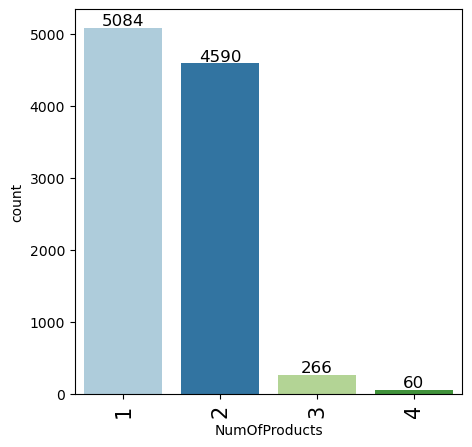

In [19]:
labeled_barplot(data,"NumOfProducts")

* Majority of customers have 1 & 2 products
* Very few customers have more than 2 products

`HasCrCard`

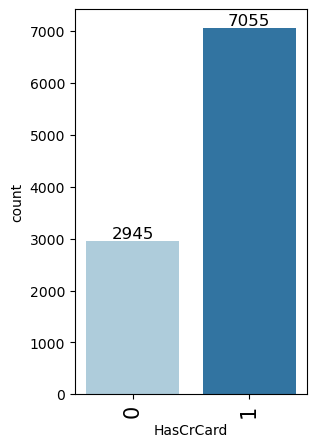

In [20]:
labeled_barplot(data,"HasCrCard")

* Customers with credit cards are majority
* We also observe that 30% of the population do not have a credit card

`IsActiveMember`

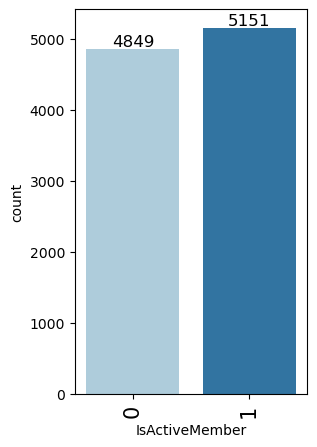

In [21]:
labeled_barplot(data,"IsActiveMember")

* Over 5000 customers are active
* We observe a high number of inactive customers as well

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


`EstimatedSalary`

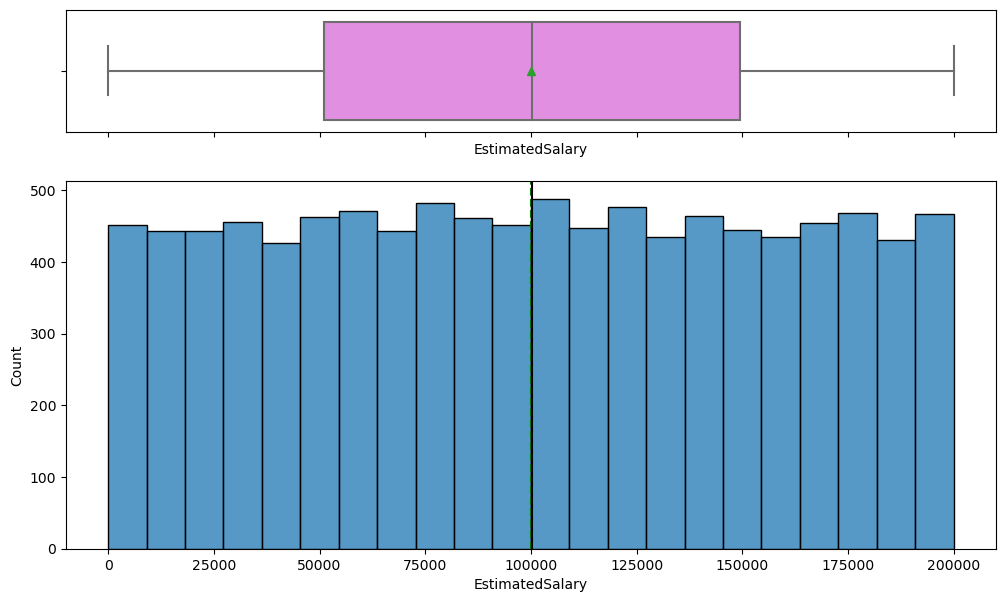

In [23]:
histogram_boxplot(data,"EstimatedSalary")

* Distribution for this column is normal

`Exited`

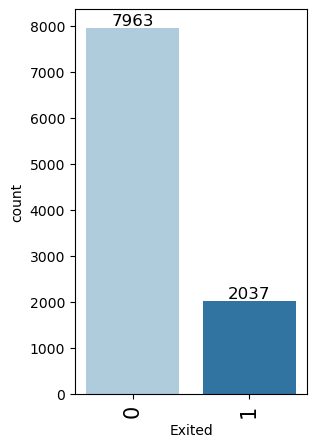

In [24]:
labeled_barplot(data,"Exited")

* 7963 of the population is not exited
* 2037 customers have exited the bank representing 20% churn rate

### Bivariate Analysis

#### Checking for Correlations

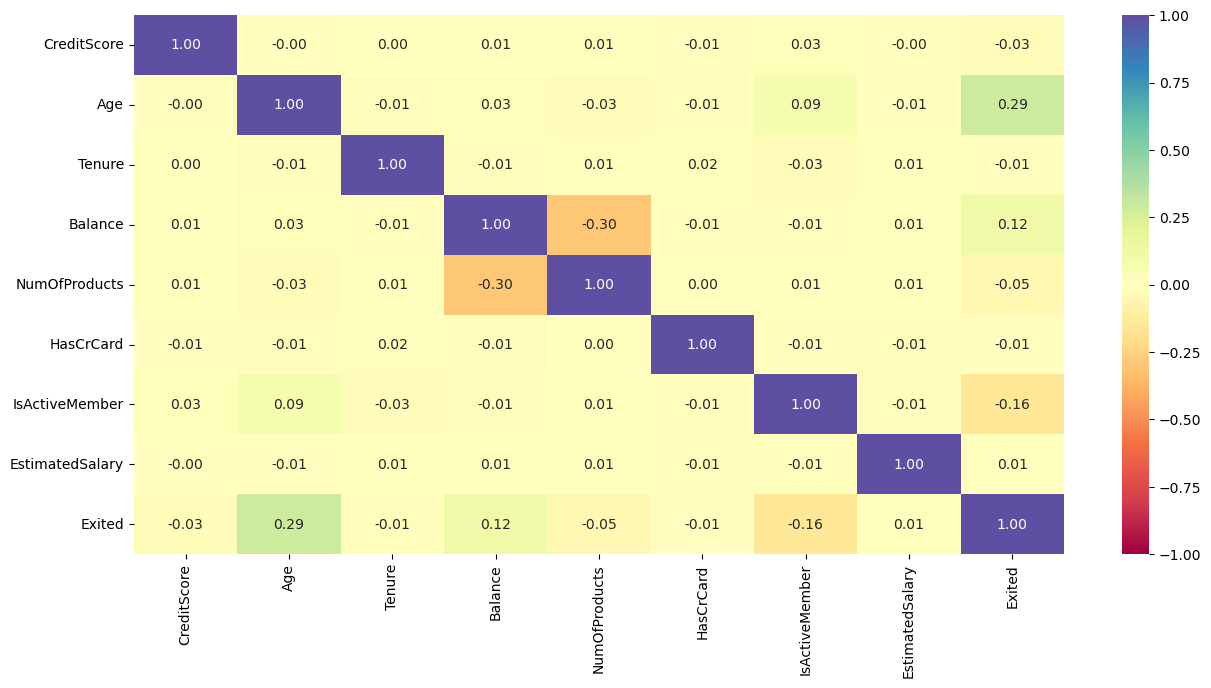

In [25]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Exploring the correlation between CreditScore, Tenure, Estimated Salary, HasCrCard & Exited Status**

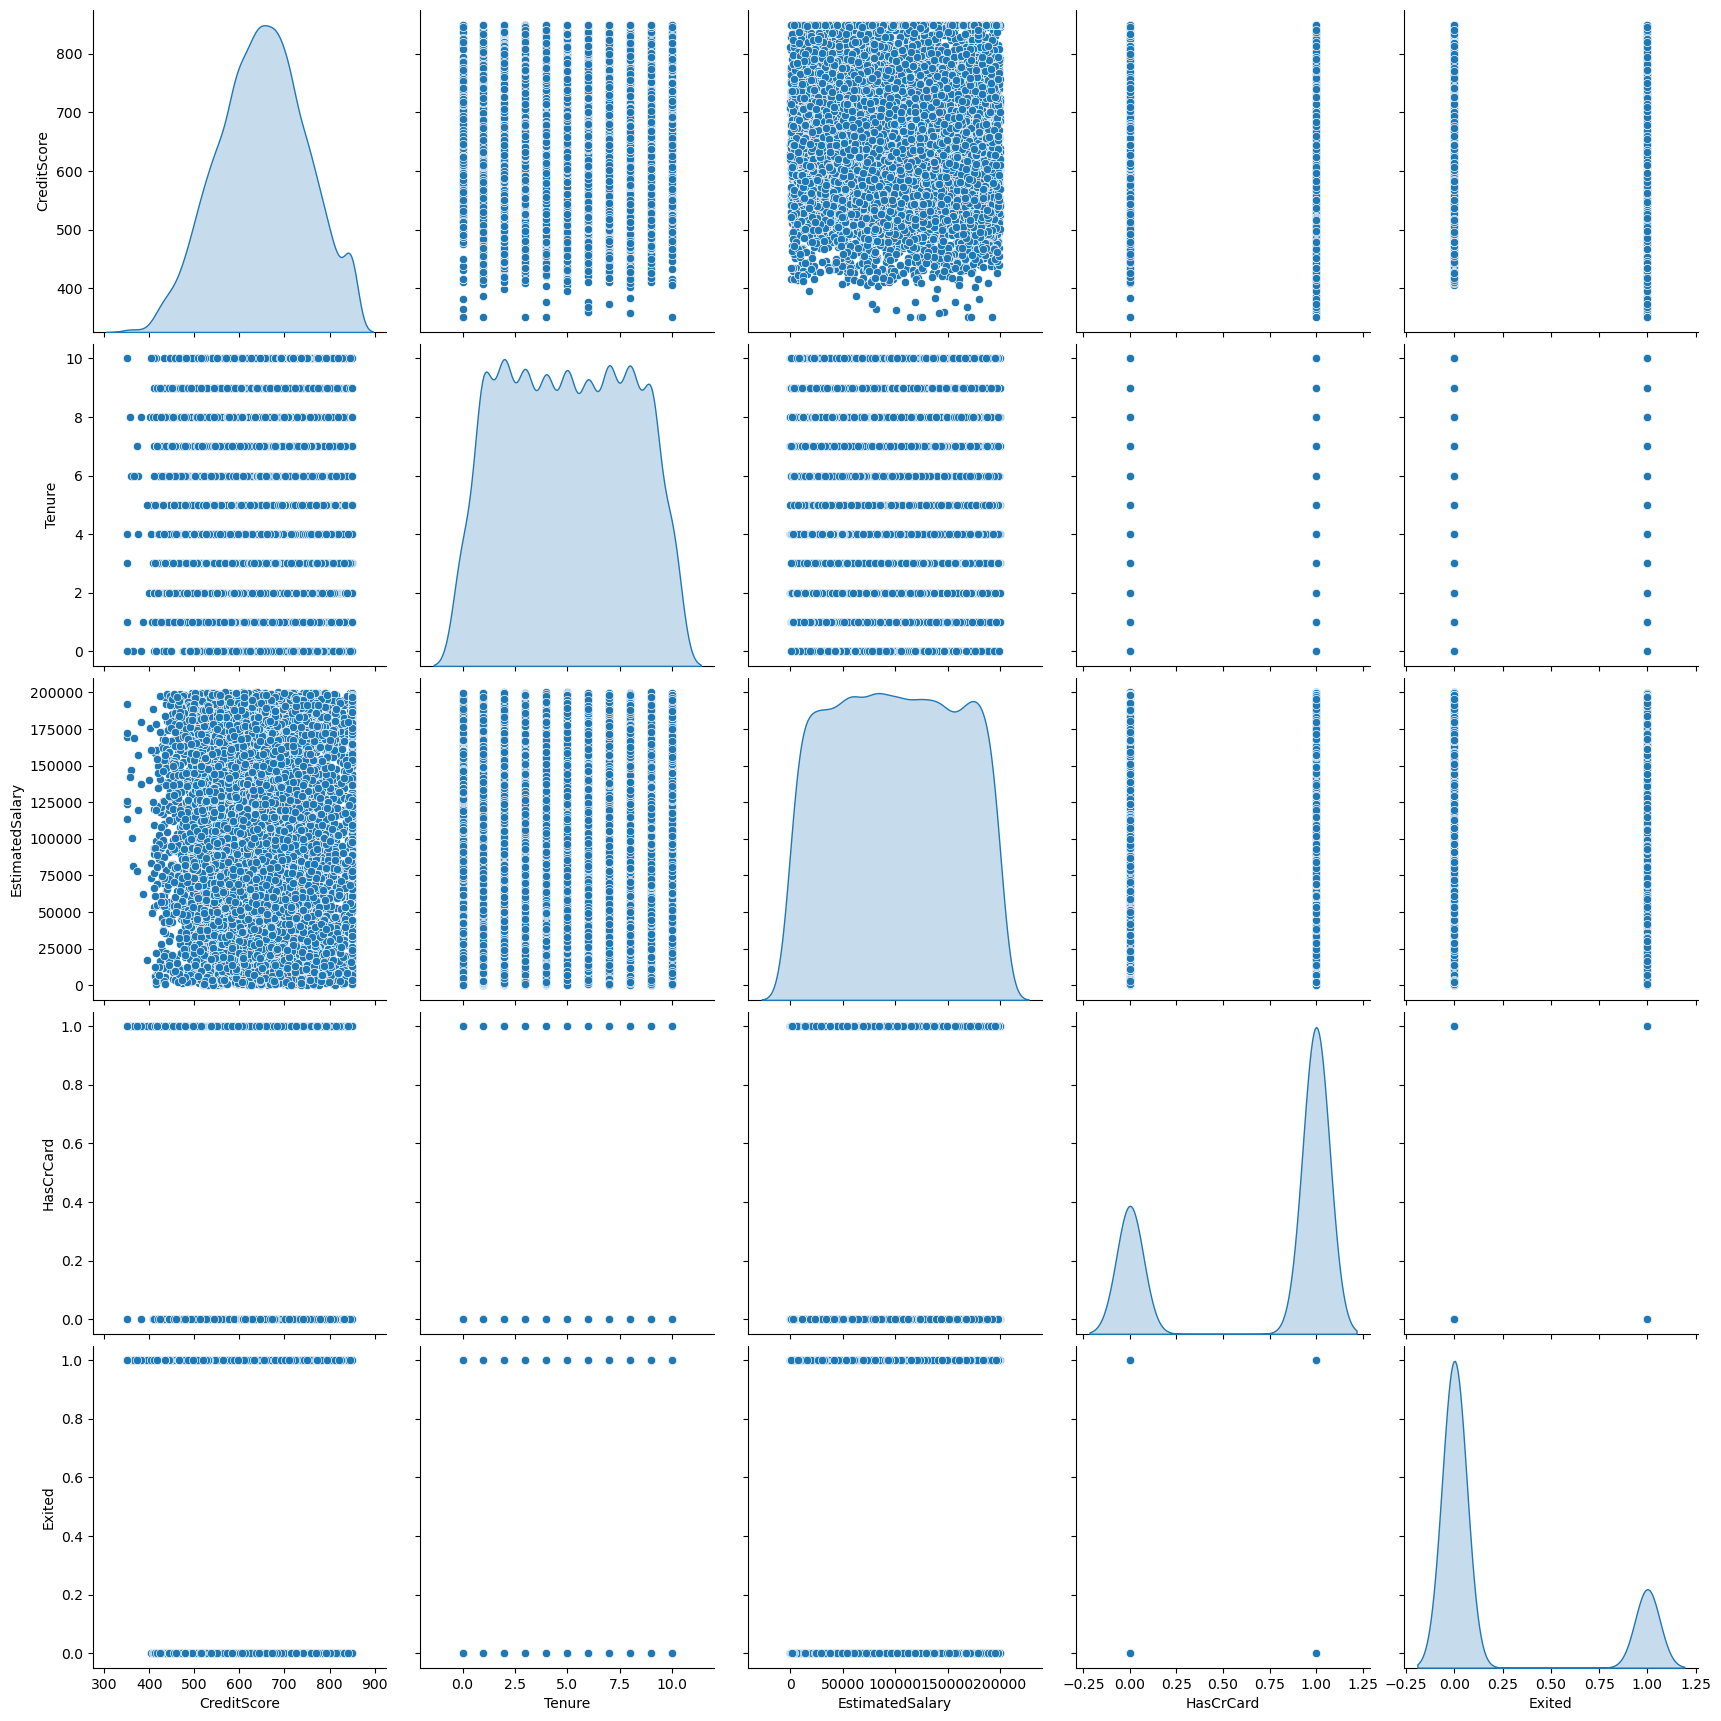

In [26]:
sns.pairplot(data[['CreditScore','Tenure', 'EstimatedSalary','HasCrCard','Exited']],diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

**Exploring the Relationship between Exited and Geography**

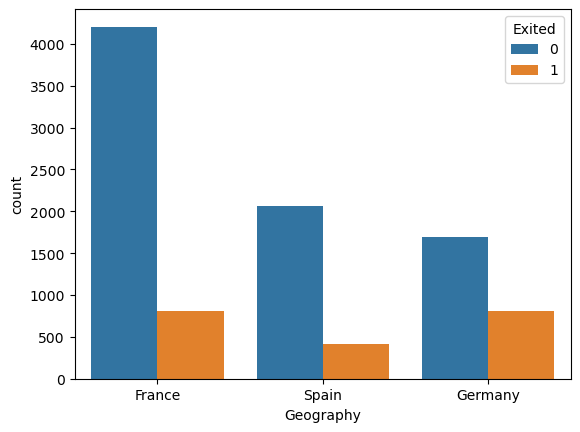

In [27]:
sns.countplot(data=data, x="Geography", hue="Exited")
plt.show()

**Exploring the Relationship between Exited and Gender**

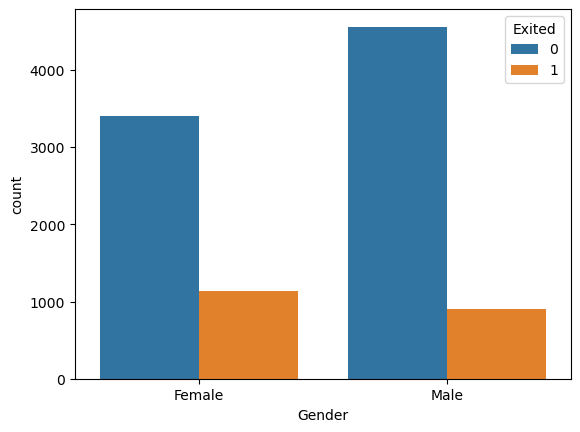

In [28]:
sns.countplot(x='Gender', hue = 'Exited',data = data)
plt.show()

**Exploring the Relationship between Exited and HasCrCard**

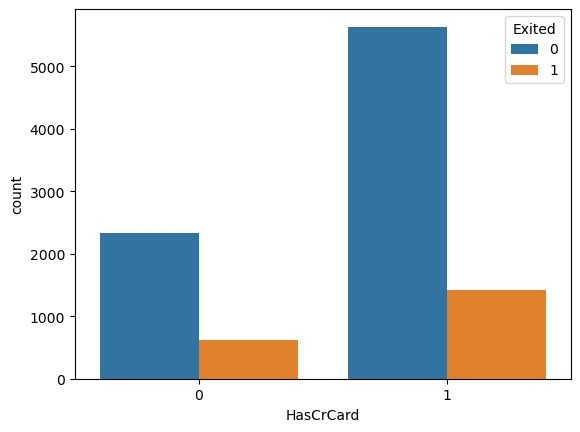

In [29]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = data)
plt.show()

**Exploring the Relationship between Exited and IsActiveMember**

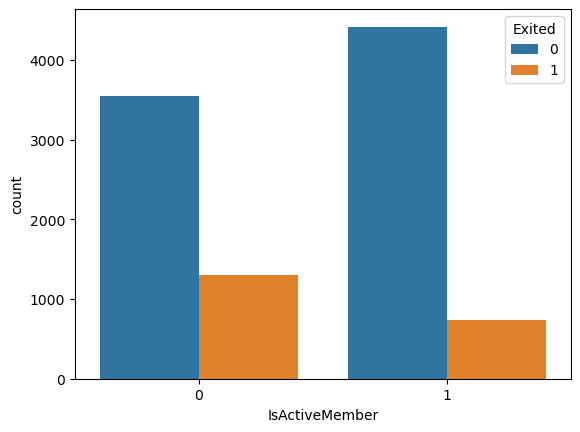

In [30]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data)
plt.show()

### Additional EDA Insights

* There appears to be near zero or no correlation between Tenure, Estimated Salary, HasCrCard & Exited Status
* A negative correlation is observed between CreditScore & Exited Status
* We observe a strong correlation between Exited and Age columns
* We also observe a positive correlation between Balance & Exited Columns 
* IsActiveMember is negatively correlated with Exited -- which makes sense since exited members cannot be active
* France & Germany constitute the highest number of customers who have exited the bank with spain gaving the lowest
* We observe a greater number of female customers who have exited more than male customers
* Customers with credit cards have exited more than customers with no credit cards

## Data Preprocessing

### Making a copy of the original dataframe

In [31]:
df_copy = data.copy()

### Splitting Target & Predictors

In [32]:
X=df_copy.drop("Exited",axis=1)
y=df_copy["Exited"]

In [33]:
#Checking Predictors
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


### Normalizing the data (Balance & Estimated Salary)

In [34]:
sc=StandardScaler()
tempBalance = sc.fit(X[["Balance"]])
tempEstimatedSalary= sc.fit(X[["EstimatedSalary"]])
X[["Balance"]] = tempBalance.transform(X[["Balance"]])
X[["EstimatedSalary"]] = tempEstimatedSalary.transform(X[["EstimatedSalary"]])

In [35]:
#Checking to confirm
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,-1.740469,1,1,1,0.021886
1,608,Spain,Female,41,1,-0.283134,1,0,1,0.216534
2,502,France,Female,42,8,1.035873,3,1,0,0.240687
3,699,France,Female,39,1,-1.740469,2,0,0,-0.108918
4,850,Spain,Female,43,2,0.442038,1,1,1,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,-1.740469,2,1,0,-0.066419
9996,516,France,Male,35,10,-0.742869,1,1,1,0.027988
9997,709,France,Female,36,7,-1.740469,1,0,1,-1.008643
9998,772,Germany,Male,42,3,-0.434985,2,1,0,-0.125231


### Encode Categorical Columns 

In [36]:
X = pd.get_dummies(X, columns=['Gender', 'Geography'])

In [37]:
#Confirm 
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,-1.740469,1,1,1,0.021886,1,0,1,0,0
1,608,41,1,-0.283134,1,0,1,0.216534,1,0,0,0,1
2,502,42,8,1.035873,3,1,0,0.240687,1,0,1,0,0
3,699,39,1,-1.740469,2,0,0,-0.108918,1,0,1,0,0
4,850,43,2,0.442038,1,1,1,-0.365276,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,-1.740469,2,1,0,-0.066419,0,1,1,0,0
9996,516,35,10,-0.742869,1,1,1,0.027988,0,1,1,0,0
9997,709,36,7,-1.740469,1,0,1,-1.008643,1,0,1,0,0
9998,772,42,3,-0.434985,2,1,0,-0.125231,0,1,0,1,0


### Splitting the Dataset into Train & Test Sets

In [38]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building

In [39]:
## Define common functions
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
def ruc_aoc_curve(target,predictions):
    fpr, tpr, thresholds = roc_curve(target, predictions)
    roc_auc = auc(fpr, tpr)

   # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classifier
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
def clearSession():
    backend.clear_session()
    #Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(42)
    random.seed(42)
    tf.random.set_seed(42)
    
def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict(predictors)
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf     

### Model Evaluation Criteria

**Model can make wrong predictions as:**
* Predicting that customer will exit and the customer stays with bank.
* Predicting that customer will stay, but the customer exits the bank.

**Which case is more important?** 
* Predicting that customer will stay, but customer actually exits. This will be a loss to the bank in terms of customers. And loss of revenue due to wrong targeting

**How to reduce this loss i.e need to reduce False Negative?**

* Bank would want recall of the model to be maximized. This will help bank identify customers that would want to exit. Increasing True postives and reducing false negative so that the bank can focus trully on the customers who want to exit the bank

### Model 1

**Initial Model Parameters**

* `Number of hidden layers` - 2 layers because the problem is not complex. This is merely trial and error and will be gradually adjusted based on the model performance.
* `Number of Neurons` - 128 Neurons for the input layer, 64 neurons each for each of the 2 hidden layers
* `Activation Function` - RelU because it is most preferred for modelling deep learning networks. It will help us avoid the vanishing/exploding gradient problem. We will however use the sigmoid function in the output layer since the problem is a binary classification problem with output 1 or 0
* `Optimizers` - We will use Adam optimizer. merely trial and error for as start with **accuracy** as the metric -- we will experiment with another optimizer after assessing model performance
* `Loss Function` - Since this is a binary classification task, we will be minimizing the **binary_crossentropy** as a start

 

In [40]:
clearSession()

model_1 = Sequential()

model_1.add(Dense(128, activation='relu',input_shape=(X_train.shape[1],)))

# First hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# Output layer with only one neuron and sigmoid as activation function
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss = 'binary_crossentropy', optimizer='adamax', metrics=[Recall()])

model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14,273
Trainable params: 14,273
Non-trainable params: 0
_________________________________________________________________


In [41]:
history_1 = model_1.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    epochs=150,
                    verbose=1)

Epoch 1/150
200/200 [==============================] - 1s 3ms/step - loss: 1.4772 - recall: 0.0514 - val_loss: 0.5006 - val_recall: 0.0062
Epoch 2/150
200/200 [==============================] - 0s 2ms/step - loss: 0.5008 - recall: 0.0333 - val_loss: 0.4936 - val_recall: 0.0000e+00
Epoch 3/150
200/200 [==============================] - 0s 2ms/step - loss: 0.5062 - recall: 0.1157 - val_loss: 0.4699 - val_recall: 0.0000e+00
Epoch 4/150
200/200 [==============================] - 0s 2ms/step - loss: 0.5262 - recall: 0.1770 - val_loss: 0.7684 - val_recall: 0.8882
Epoch 5/150
200/200 [==============================] - 0s 2ms/step - loss: 0.5006 - recall: 0.1611 - val_loss: 0.4562 - val_recall: 0.0155
Epoch 6/150
200/200 [==============================] - 0s 2ms/step - loss: 0.5364 - recall: 0.1967 - val_loss: 0.5062 - val_recall: 0.5435
Epoch 7/150
200/200 [==============================] - 0s 2ms/step - loss: 0.5209 - recall: 0.2027 - val_loss: 0.5063 - val_recall: 0.0000e+00
Epoch 8/150
200

#### Model Performance Evaluation

##### Recall vs Epochs

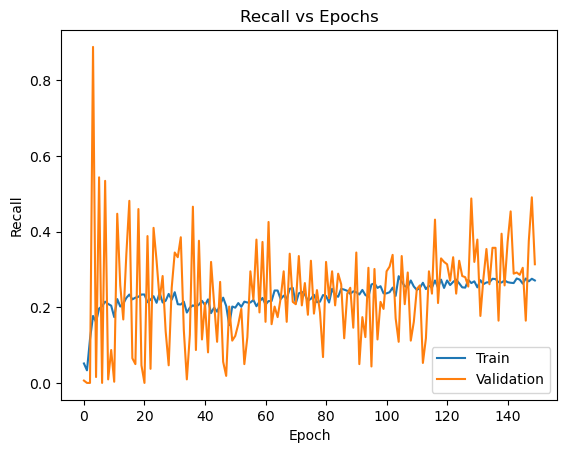

In [42]:
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('Recall vs Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

##### ROC-AUC curve on Training Data

In [43]:
y_pred = model_1.predict(X_train)
auc_roc = roc_auc_score(y_train, y_pred)
print("AUC ROC:", auc_roc)

250/250 [==============================] - 0s 1ms/step
AUC ROC: 0.78270948078257


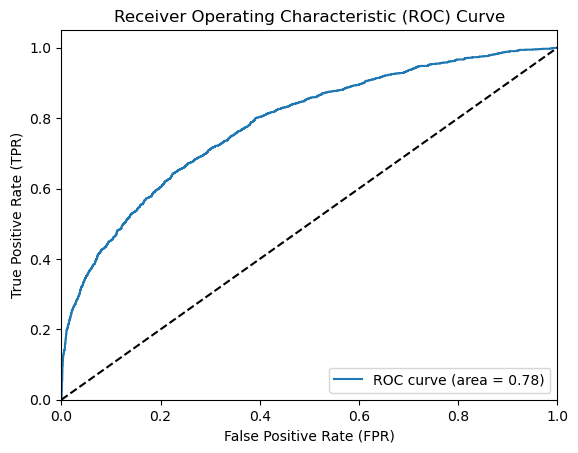

In [44]:
ruc_aoc_curve(y_train,y_pred)

##### ROC-AUC curve on Testing  Data

In [45]:
y_pred_test = model_1.predict(X_test)
auc_roc_test = roc_auc_score(y_test, y_pred_test)
print("AUC ROC:", auc_roc_test)

63/63 [==============================] - 0s 1ms/step
AUC ROC: 0.7900565433353759


##### Optimum Threshold

In [46]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold is",optimal_threshold)

Optimal Threshold is 0.24877034


##### Performance on Training Data with optimum Threshold

In [47]:
 model_performance_classification_sklearn_with_threshold(model_1, X_train, y_train, optimal_threshold)

250/250 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1
0,0.748375,0.641119,0.425515,0.511526


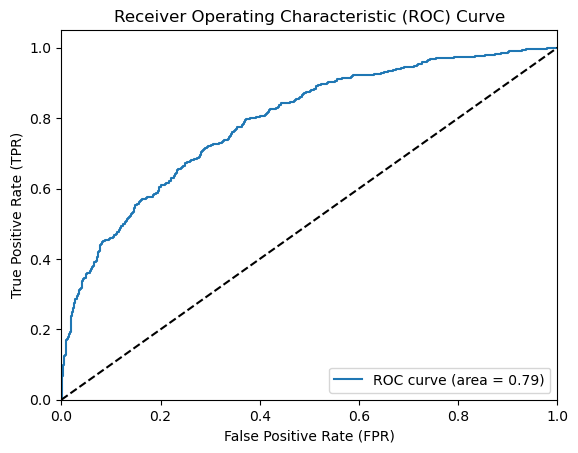

In [48]:
ruc_aoc_curve(y_test,y_pred_test)

##### Performance on Testing Data with optimum Threshold

In [49]:
 model_performance_classification_sklearn_with_threshold(model_1, X_test, y_test, optimal_threshold)

63/63 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1
0,0.744,0.651399,0.405705,0.5


##### Observations after Evaluation

* The validation recall is fluctuatingand not increasing steadily with the increase in the epochs.
* The training recall is is steady and it is increasing with the increase in the epochs.
* The optimal threshold is 0.24
* The ROC Curve score  is 0.78 on training data
* The model performs slightly better on testing data with a ROC score of 0.79
* The model gives a recall of 64% on training data and 65% on testing data
* The F1 score on test & tarining data is almost the same at 50 & 51% respectively

### Model Performance Improvement Suggestions

 We will try to improve the model by adding additional parameters and see if the performance will improve

* `Optimizers` - We will use RMSProp optimzer with learning rate and evaluate performance
* `Initializers` - Introduce initializers and assess performance
* `Drop Outs & Batch Normalization`  - We will introduce regularization techniques 
* `Increase Number of  Layers` - We will add additional Layers and assess model Performance


### Model 2 

**With Intializers, RMSProp Optimizer with Learning Rate**

In [50]:
clearSession()
model_2 = Sequential()

model_2.add(Dense(128, activation='relu', kernel_initializer='he_uniform',input_shape=(X_train.shape[1],)))

# First hidden layer with 64 neurons and relu activation function
model_2.add(Dense(64, activation='relu',kernel_initializer='he_uniform',))

# Second hidden layer with 64 neurons and relu activation function
model_2.add(Dense(64, activation='relu',kernel_initializer='he_uniform',))

# Output layer with only one neuron and sigmoid as activation function
model_2.add(Dense(1, activation='sigmoid'))

optimizer = RMSprop( learning_rate=0.001)

model_2.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics=[Recall()])

model_2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14,273
Trainable params: 14,273
Non-trainable params: 0
_________________________________________________________________


In [51]:
history_2 = model_2.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    epochs=150,
                    verbose=1)

Epoch 1/150
200/200 [==============================] - 1s 2ms/step - loss: 12.4375 - recall: 0.2405 - val_loss: 1.4851 - val_recall: 0.0031
Epoch 2/150
200/200 [==============================] - 0s 2ms/step - loss: 6.7815 - recall: 0.2337 - val_loss: 10.6966 - val_recall: 1.0000
Epoch 3/150
200/200 [==============================] - 0s 2ms/step - loss: 3.9357 - recall: 0.2519 - val_loss: 1.9004 - val_recall: 0.0000e+00
Epoch 4/150
200/200 [==============================] - 0s 2ms/step - loss: 1.8121 - recall: 0.2526 - val_loss: 0.6821 - val_recall: 0.0031
Epoch 5/150
200/200 [==============================] - 0s 2ms/step - loss: 0.8975 - recall: 0.1710 - val_loss: 0.7595 - val_recall: 0.0000e+00
Epoch 6/150
200/200 [==============================] - 0s 2ms/step - loss: 0.6164 - recall: 0.0832 - val_loss: 0.4986 - val_recall: 0.0000e+00
Epoch 7/150
200/200 [==============================] - 0s 2ms/step - loss: 0.5137 - recall: 0.0030 - val_loss: 0.5508 - val_recall: 0.0031
Epoch 8/150
2

#### Model Performance Evaluation

##### Recall Vs Epochs

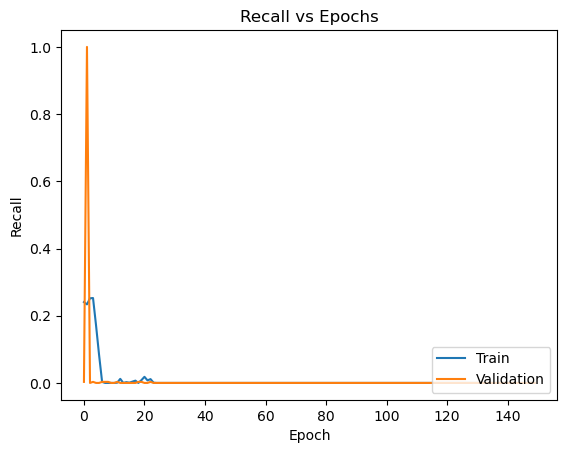

In [52]:
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('Recall vs Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

##### ROC-AUC on Training Data

In [53]:
y_pred2 = model_2.predict(X_train)
auc_roc2 = roc_auc_score(y_train, y_pred2)
print("AUC ROC:", auc_roc2)

250/250 [==============================] - 0s 1ms/step
AUC ROC: 0.4996958637469586


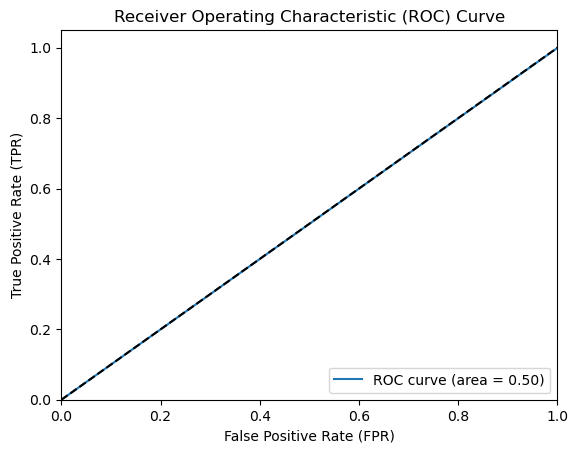

In [54]:
ruc_aoc_curve(y_train,y_pred2)

##### ROC-AUC on Testing Data

In [55]:
y_pred2_test = model_2.predict(X_test)
auc_roc2_test = roc_auc_score(y_test, y_pred2_test)
print("AUC ROC:", auc_roc2_test)

63/63 [==============================] - 0s 1ms/step
AUC ROC: 0.49872773536895676


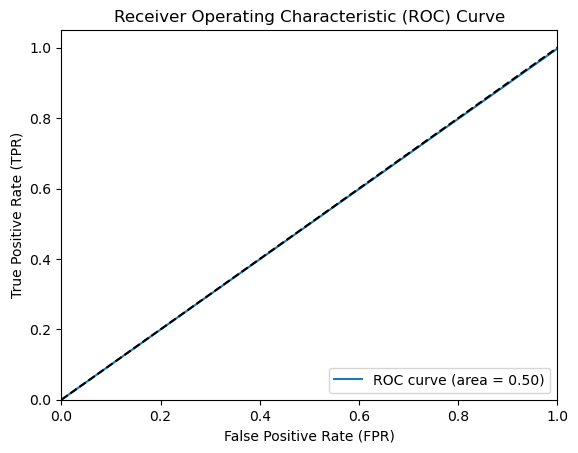

In [56]:
ruc_aoc_curve(y_test,y_pred2_test)

##### Optimum Threshold

In [57]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred2)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold is",optimal_threshold)

Optimal Threshold is 1.2062407


##### Performance on Training Data with optimum Threshold

In [58]:
 model_performance_classification_sklearn_with_threshold(model_2, X_train, y_train, optimal_threshold)

250/250 [==============================] - 0s 972us/step


,Accuracy,Recall,Precision,F1
0,0.7945,0.0,0.0,0.0


##### Performance on Testing Data with optimum Threshold

In [59]:
 model_performance_classification_sklearn_with_threshold(model_2, X_test, y_test, optimal_threshold)

63/63 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1
0,0.8035,0.0,0.0,0.0


##### Observations After Evaluation

* The validation recall decreases steeply with an increase in epochs
* The model exhibits slightly lower and poor performance on AUC ROC score than model1 on training and testing data
* The model is not appropriate as it gives a recall/F1 score of 0

### Model 3

**With Regularization & Additional Layers**

In [60]:
clearSession()
# Initializing the model
model_3 = Sequential()

model_3.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

model_3.add(Dropout(0.2))
 
model_3.add(Dense(128, activation='relu'))

model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))

model_3.add(Dense(128, activation='relu'))

model_3.add(Dropout(0.2))

model_3.add(Dense(1, activation='sigmoid'))

optimizer = RMSprop()

model_3.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics=[Recall()])

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                        

In [61]:
history_3 = model_3.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    epochs=200,
                    verbose=1)

Epoch 1/200
200/200 [==============================] - 1s 3ms/step - loss: 0.5675 - recall: 0.0461 - val_loss: 0.5007 - val_recall: 0.0000e+00
Epoch 2/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5354 - recall: 0.0166 - val_loss: 0.5374 - val_recall: 0.0000e+00
Epoch 3/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5298 - recall: 0.0129 - val_loss: 0.4929 - val_recall: 0.0000e+00
Epoch 4/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5151 - recall: 0.0151 - val_loss: 0.4925 - val_recall: 0.0000e+00
Epoch 5/200
200/200 [==============================] - 1s 3ms/step - loss: 0.5065 - recall: 0.0227 - val_loss: 0.4883 - val_recall: 0.0280
Epoch 6/200
200/200 [==============================] - 1s 3ms/step - loss: 0.4970 - recall: 0.0386 - val_loss: 0.4577 - val_recall: 0.0031
Epoch 7/200
200/200 [==============================] - 0s 2ms/step - loss: 0.4900 - recall: 0.0469 - val_loss: 0.4498 - val_recall: 0.0776
Epoch 8/200

#### Model Performance Evaluation

##### Recall Vs Epochs

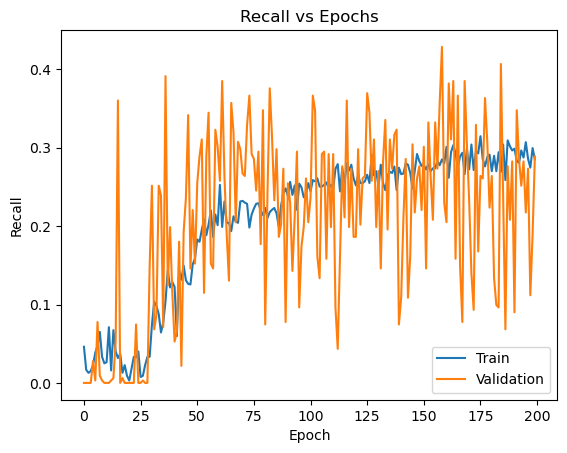

In [62]:
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('Recall vs Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

##### ROC-AUC on Training Data

In [63]:
y_pred3 = model_3.predict(X_train)
auc_roc3 = roc_auc_score(y_train, y_pred3)
print("AUC ROC:", auc_roc3)

250/250 [==============================] - 0s 1ms/step
AUC ROC: 0.8024351762956702


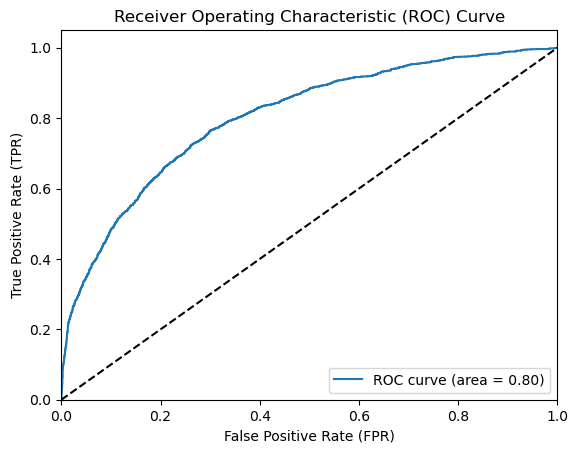

In [64]:
ruc_aoc_curve(y_train,y_pred3)

##### ROC-AUC on Testing Data

In [65]:
y_pred3_test = model_3.predict(X_test)
auc_roc3_test = roc_auc_score(y_test, y_pred3_test)
print("AUC ROC:", auc_roc3_test)

63/63 [==============================] - 0s 1ms/step
AUC ROC: 0.810104013769276


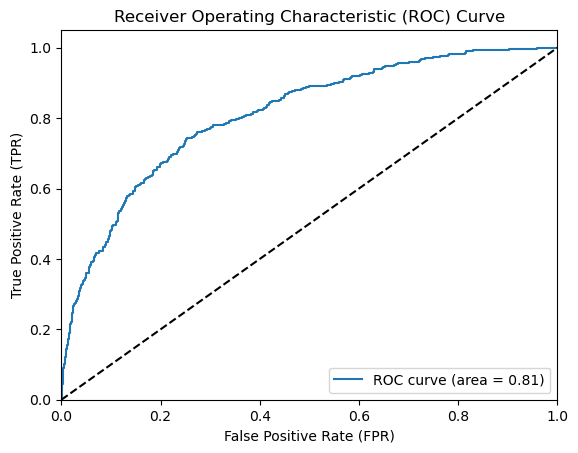

In [66]:
ruc_aoc_curve(y_test,y_pred3_test)

##### Optimum Threshold

In [67]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred3)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold is",optimal_threshold)

Optimal Threshold is 0.19718802


##### Performance on Training Data with Optimum Threshold

In [68]:
 model_performance_classification_sklearn_with_threshold(model_3, X_train, y_train, optimal_threshold)

250/250 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1
0,0.71375,0.76399,0.39772,0.523115


##### Performance on Testing Data with Optimum Threshold

In [69]:
 model_performance_classification_sklearn_with_threshold(model_3, X_test, y_test, optimal_threshold)

63/63 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1
0,0.7095,0.773537,0.38191,0.511354


##### Observations after Evaluation

* The validation recall fluctuates highly indicating overfiting on the valdiation set
* Training recall rises steadily with minimal fluctuations as epochs increase
* The model performs much better than model 1 & Model 2 with a better recall, AUC/ROC scores on both testing & training data
* The F1 & Precision Scores are slightly lower at 51%  and 38% on both testing and training datasets

### Model Comparison

* We have trained 3 different models with some changes in architecture and Optimizer.
* Model 1 gave a good ROC/AUC score of 78 & 79, recall of 64 & 65% on training and testing datasets respectively
* Model 2 Performed worst after tuning with initializers, optmizers with learning rate of 0.0001. It gave a ROC/AUC score of less than 50%  and a recal of Zero on training and testing datasets respectively
* Model 3 performed best after adding more layers and neurons and regularization with Drop out and Batch Normalization while increasing the number of epochs
* Model 3 gave an ROC/AUC score of 80 & 81% on the training and testing datasets respectively. The highest amongst the 3 models developed
* Model 3 gave the highest recall of 76% and 77% on both training and testing data sets with optimal threshold

## Actionable Insights & Recommendations

* From the EDA we observed that majority of exited customers are FeMale, we however obsere a corresponding high number as well with male customers. The bank can try tageting both customer types with specific marketing strategies in a bid to reduce the chun rate
* We also observe a high number of customers with credit cards exiting the bank. The bank can review its credit card offering and investigate further if there are any issues with the product that can be addressed or improved
* Inactive members are most likely to exit the bank. We observe a corelation here. Then bank can target the inactive members in a bid to reactivate them. Further investigation on why they are inactive will guide the marketing and product teams accordingly
* France & Germany constitute the highest number of customers who have exited the bank with spain gaving the lowest. The marketing team can target customers from these specific geographic locations
* We observe a strong correlation between Exited and Age variables. We can infer that the older the customers the more likely they are to exit the bank hence the bank can focus its marketing strategies on older customers while attracting younger ones
* We also observe a positive correlation between Balance & Exited Columns. Customers with low balances are more likely to exit than those with higher balances. The bank should focus on maintianing their high networth customers and also strategize on deposit mobilization 
